# Customer Segmentation

## 1. Importing Necessary Libraries

In [39]:
# utilities
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Loading the Dataset

In [40]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

## 3. Exploratory Data Analysis

In [41]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
df.shape

(200, 5)

In [43]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
50,51,Female,49,42,52
127,128,Male,40,71,95
37,38,Female,30,34,73
149,150,Male,34,78,90
19,20,Female,35,23,98


In [44]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [45]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [46]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [47]:
df.Age.value_counts()

32    11
35     9
31     8
19     8
30     7
49     7
40     6
38     6
36     6
47     6
23     6
27     6
20     5
48     5
21     5
34     5
50     5
29     5
28     4
24     4
54     4
67     4
59     4
18     4
68     3
60     3
46     3
43     3
45     3
22     3
25     3
39     3
37     3
33     3
58     2
66     2
65     2
63     2
26     2
57     2
44     2
53     2
52     2
51     2
41     2
42     2
70     2
56     1
55     1
64     1
69     1
Name: Age, dtype: int64

## 4. Data Visualization

### Plotting gender count

<AxesSubplot:xlabel='Gender', ylabel='count'>

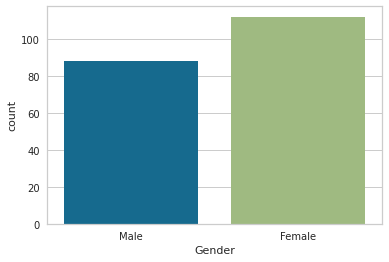

In [48]:
sns.countplot(df.Gender)

### Plotting Age Distribution

<AxesSubplot:xlabel='Age', ylabel='Density'>

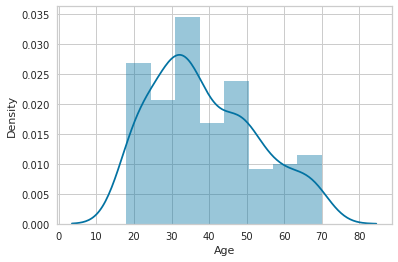

In [49]:
sns.distplot(df["Age"])

### Plotting Income Distribution

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

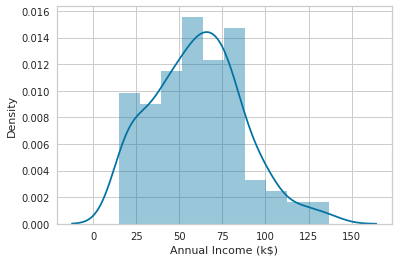

In [50]:
sns.distplot(df["Annual Income (k$)"])

### Plotting Spending Score Distribution

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

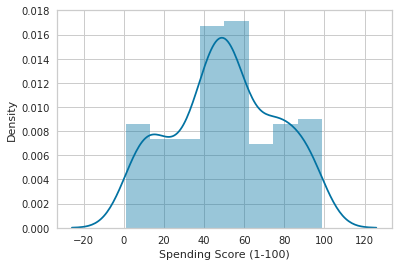

In [51]:
sns.distplot(df["Spending Score (1-100)"])

### Plotting Scatter Age - Spending Score 

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

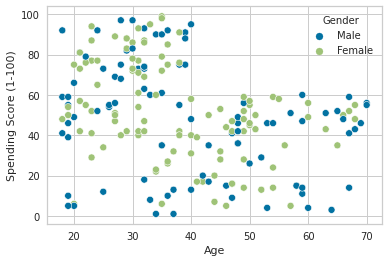

In [52]:
sns.scatterplot(x = "Age", y = "Spending Score (1-100)", hue = "Gender", data = df)

## 5. Clustering 

**We are clustering according to Age and Spending Score**

In [53]:
x = df[["Age", "Spending Score (1-100)"]]

In [54]:
x.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


**Defining the model**

In [55]:
model = KMeans(n_clusters = 4)

**Fitting and predicting**

In [56]:
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs='deprecated',
       precompute_distances='deprecated', random_state=None, tol=0.0001,
       verbose=0)

In [57]:
pred = model.predict(x)

In [58]:
pred

array([0, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 0, 3, 1, 0, 1,
       3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 2, 0,
       3, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

**Looking to silhoutte score**

In [59]:
silhouette_score(x, pred)

0.49973941540141753

**We create a new dataframe with cluster column that specify the cluster of each person**

In [60]:
clusters = x.assign(Cluster = model.labels_)
clusters

,Age,Spending Score (1-100),Cluster
0,19,39,0
1,21,81,1
2,20,6,3
3,23,77,1
4,31,40,0
...,...,...,...
195,35,79,1
196,45,28,3
197,32,74,1
198,32,18,3


**We are looking the center of the clusters**

In [61]:
model.cluster_centers_

array([[27.61702128, 49.14893617],
       [30.1754386 , 82.35087719],
       [55.70833333, 48.22916667],
       [43.29166667, 15.02083333]])

**We are looking the labels of the clusters**

In [62]:
model.labels_

array([0, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 0, 3, 1, 0, 1,
       3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 2, 0,
       3, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

### Visualizing the Clusters

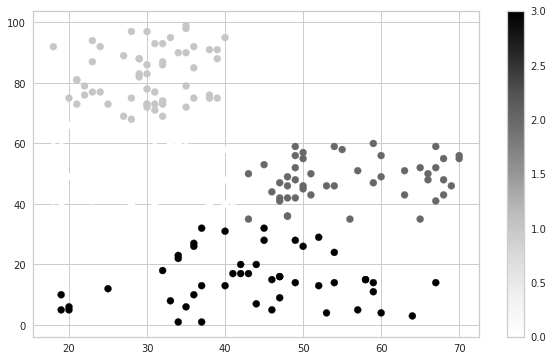

In [63]:
plt.figure(figsize=(10,6))
plt.scatter(x["Age"], x["Spending Score (1-100)"], c = pred)
plt.legend()
plt.colorbar()
plt.show()

### We are printing the silhouette score of each number of cluster from 2 to 10 in order to decide which number to select

In [64]:
allscore = []
allclusters = []
sum_of_squared_distances = []
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster +=1
        model = KMeans(n_clusters = no_of_cluster)
        pred = model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(x, pred)
        print(f"Number of cluster {no_of_cluster}, silhoutte score {score}")
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)

Number of cluster 2, silhoutte score 0.4692341232501655
Number of cluster 3, silhoutte score 0.45300127016521263
Number of cluster 4, silhoutte score 0.49973941540141753
Number of cluster 5, silhoutte score 0.43167500325197866
Number of cluster 6, silhoutte score 0.4405479018621985
Number of cluster 7, silhoutte score 0.42313509747504796
Number of cluster 8, silhoutte score 0.43410800435629476
Number of cluster 9, silhoutte score 0.41410422498780924
Number of cluster 10, silhoutte score 0.4117691261276091


### To decide easily, we use the elbow method. So we set the number of clusters as 5.

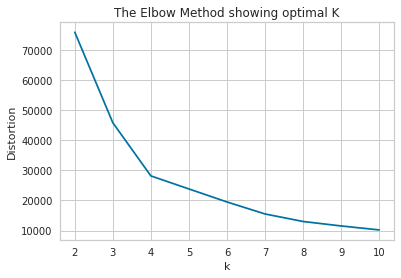

In [65]:
plt.plot(allclusters, sum_of_squared_distances, marker = "x")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing optimal K")
plt.show()

### We can also use the pycaret library

In [66]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [67]:
from pycaret.clustering import *
clul = setup(df, session_id = 123, log_experiment = True, log_plots = True, experiment_name = "Customer Segmentation")

,Description,Value
0,session_id,123
1,Original Data,"(200, 5)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(200, 5)"
9,CPU Jobs,-1


In [68]:
kmeans = create_model("kmeans", num_clusters = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4438,150.8489,0.8226,0,0,0


In [69]:
plot_model(kmeans)

In [70]:
plot_model(kmeans, feature = "Age", label = True)

In [71]:
plot_model(kmeans, plot = "tsne")

### Plot decide the number of cluster instead of us

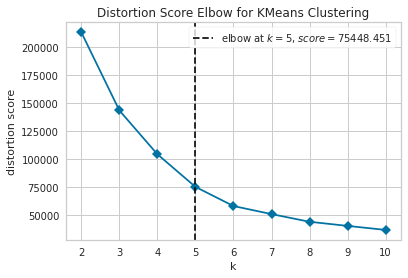

In [72]:
plot_model(kmeans, plot = "elbow")

In [73]:
clusters

,Age,Spending Score (1-100),Cluster
0,19,39,0
1,21,81,1
2,20,6,3
3,23,77,1
4,31,40,0
...,...,...,...
195,35,79,1
196,45,28,3
197,32,74,1
198,32,18,3


### Let's take a look at the first 10 people, We can say that these 10 people are relatively young generation. We see that their spending scores are also high. Thus, we included the young generation people with high spending scores in one cluster. Thus, we will offer these people products suitable for their age, and thus we will increase the profit of our company.

In [74]:
clusters.sort_values("Cluster").head(10)

,Age,Spending Score (1-100),Cluster
0,19,39,0
88,34,60,0
87,22,55,0
84,21,57,0
81,38,55,0
78,23,52,0
77,40,48,0
75,26,54,0
69,32,47,0
68,19,59,0


### What we see here is that these people have low spending scores and are relatively average in age. Thus, we see that these people are frugal people who do not spend much. Therefore, we will not show these people products that they will not buy, we will maximize the profit of our company by only showing products for household needs.

In [75]:
clusters.sort_values("Cluster").tail(10)

,Age,Spending Score (1-100),Cluster
152,44,20,3
154,47,16,3
156,37,1,3
158,34,1,3
30,60,4,3
162,19,5,3
164,50,26,3
166,42,20,3
144,25,12,3
8,64,3,3


### Let's make a prediction. Let's our guy is 23 years old and his spending score is 47. We are expect to see cluster 0. Because above we saw that cluster 0 is young generation and they love to spend money. So let's see the cluster.

In [81]:
ex = pd.DataFrame({"Age": 23, "Spending Score (1-100)": 47}, index = [0])
model.predict(ex)[0]

0

**It predicted correctly.**